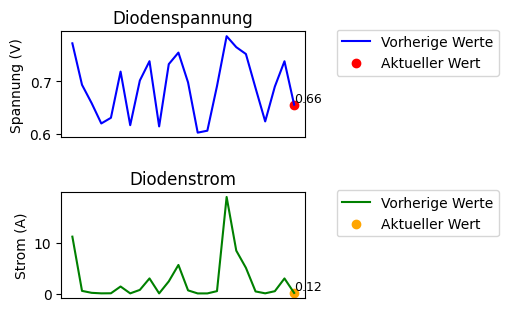

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import time 
import numpy as np
from IPython.display import clear_output
from Messdaten_Generator import DataGenerator
plt.ion()  # Interaktiver Modus aktivieren

# Globaler Abbruchindikator
beenden = False 

# Tastendruck-Eventhandler definieren
def taste_druck(event): 
    global beenden
    if event.key == 'q':
        beenden = True

# Plot initialisieren und Eventhandler verbinden
plt.figure(figsize=(12, 8))
fig = plt.gcf()
fig.canvas.mpl_connect('key_press_event', taste_druck)

# Daten-Generator und Listen initialisieren
daten_generator = DataGenerator()
zeitstempel = []
spannungen = []
stroeme = []

while True:
    if beenden:
        print("Aufzeichnung beendet...")
        break

    # Neue Messdaten generieren
    daten = daten_generator.generiere_messdaten()
    zeitstempel.append(daten['zeit'])
    spannungen.append(daten['spannung'])
    stroeme.append(daten['strom'])

    # Nur die letzten 60 Datenpunkte behalten
    if len(zeitstempel) > 60:
        zeitstempel.pop(0)
        spannungen.pop(0)
        stroeme.pop(0)

    # Ausgabe löschen und Plot aktualisieren
    clear_output(wait=True)
    plt.clf()

    # --- Subplot 1: Diodenspannung ---
    ax1 = plt.subplot(3, 1, 1)
    ax1.plot(zeitstempel, spannungen, color='blue', label='Vorherige Werte')
    ax1.scatter(zeitstempel[-1], spannungen[-1], color='red', label='Aktueller Wert')
    # Messwert neben dem aktuellen Punkt anzeigen
    ax1.text(zeitstempel[-1], spannungen[-1], f"{spannungen[-1]:.2f}",
             fontsize=9, verticalalignment='bottom', horizontalalignment='left')
    ax1.set_title('Diodenspannung')
    ax1.set_ylabel('Spannung (V)')
    # Legende außerhalb der Achse rechts positionieren
    ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.8))
    ax1.set_xticks([])

    # --- Subplot 2: Diodenstrom ---
    ax2 = plt.subplot(3, 1, 2)
    ax2.plot(zeitstempel, stroeme, color='green', label='Vorherige Werte')
    ax2.scatter(zeitstempel[-1], stroeme[-1], color='orange', label='Aktueller Wert')
    ax2.text(zeitstempel[-1], stroeme[-1], f"{stroeme[-1]:.2f}",
             fontsize=9, verticalalignment='bottom', horizontalalignment='left')
    ax2.set_title('Diodenstrom')
    ax2.set_ylabel('Strom (A)')
    # Legende außerhalb der Achse rechts positionieren
    ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.8))
    ax2.set_xticks([])

    # Vertikalen Abstand zwischen den Subplots vergrößern und Platz für die Legenden schaffen
    plt.tight_layout(h_pad=2.0, rect=[0, 0, 0.85, 1])
    plt.show()

    # 1 Sekunde warten
    plt.pause(1.0)
